In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Bangkitproject/tomatodataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-

In [2]:
# Import Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from sklearn.metrics import confusion_matrix, classification_report
from keras.regularizers import l2


In [3]:
# Directory Path
train_dir = '/content/tomato/train'
val_dir='/content/tomato/val'
batch_size = 32
image_size = 256

In [4]:
# List of classes
classes = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
           'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
num_classes = len(classes)
classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

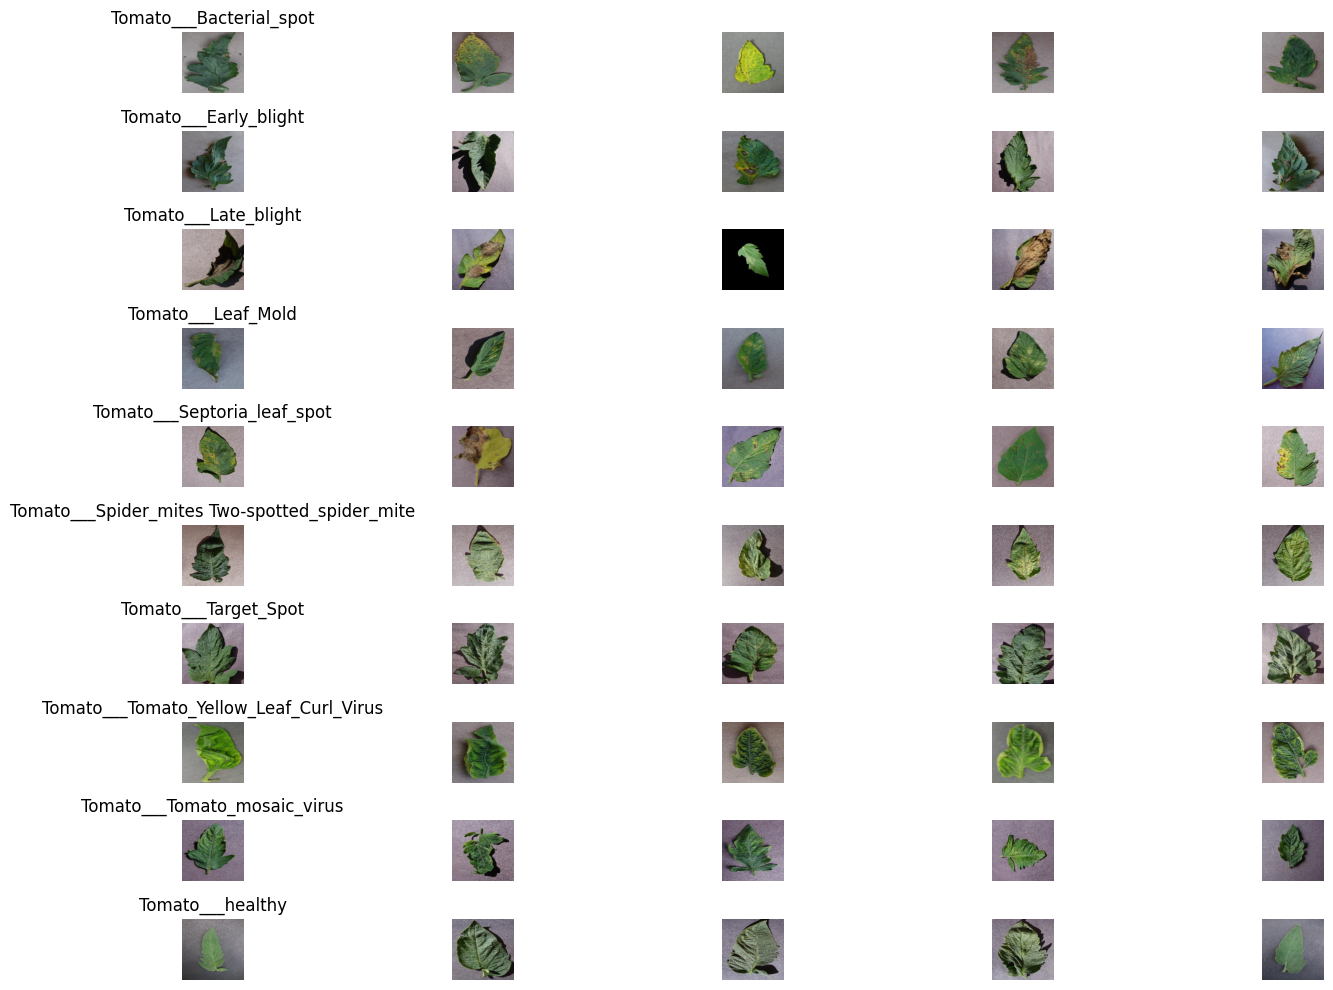

In [5]:
categories = os.listdir(train_dir)
categories.sort(key=lambda x: classes.index(x))  # Sort categories based on the order in 'classes'

plt.figure(figsize=(15, 10))
num_categories = len(categories)

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)[:5]

    for j, file in enumerate(image_files):
        img_path = os.path.join(category_path, file)
        img = load_img(img_path)

        # Use correct indices for rows and columns in subplot
        plt.subplot(num_categories, 5, i * 5 + j + 1)
        plt.imshow(img)
        plt.axis('off')

        # Add category title only for the first image of each category
        if j == 0:
            plt.title(category)

plt.tight_layout()
plt.show()

In [6]:
# Menyiapkan data generator untuk augmentasi dan pra-pemrosesan data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Skalasi nilai pixel ke rentang [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Mendefinisikan generator untuk data train dan data validasi
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Ganti dengan path direktori data train
        target_size=(image_size, image_size),  # Ukuran gambar yang diharapkan
        batch_size=batch_size,
        class_mode='categorical', # Mode kelas untuk klasifikasi multiclass
        classes=classes)

validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(image_size, image_size),  # Ukuran gambar yang diharapkan
        batch_size=batch_size,
        class_mode='categorical', # Mode kelas untuk klasifikasi multiclass
        classes=classes)

# Membangun arsitektur model CNN
# Definisikan bentuk input
input_shape = (256, 256, 3)

# Gunakan Input layer secara eksplisit
model = models.Sequential([
    layers.Input(shape=input_shape),  # Definisi bentuk input yang eksplisit
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Jumlah kelas output
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,470,026 (13.24 MB)

 Trainable params: 3,470,026 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Melatih model
history=model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.1381 - loss: 2.3930 - val_accuracy: 0.5040 - val_loss: 1.6521
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.4020 - loss: 1.6840 - val_accuracy: 0.6080 - val_loss: 1.2188
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.4872 - loss: 1.4466 - val_accuracy: 0.6960 - val_loss: 1.1349
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.5708 - loss: 1.2479 - val_accuracy: 0.7370 - val_loss: 0.9688
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.6171 - loss: 1.1312 - val_accuracy: 0.7780 - val_loss: 0.8540
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.6610 - loss: 1.0251 - val_accuracy: 0.7980 - val_loss: 0.7499
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.6918 - loss: 0.9558 - val_accuracy: 0.8200 - val_loss: 0.6985
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7104 - loss: 0.9064 -

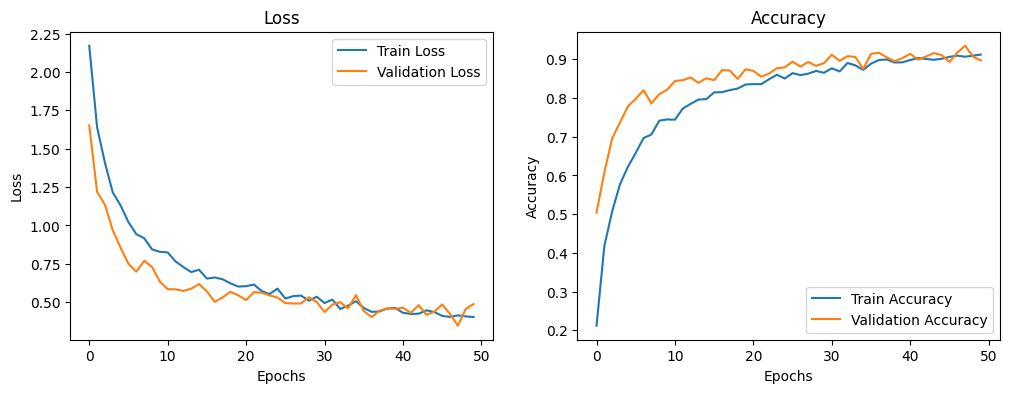

In [10]:
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


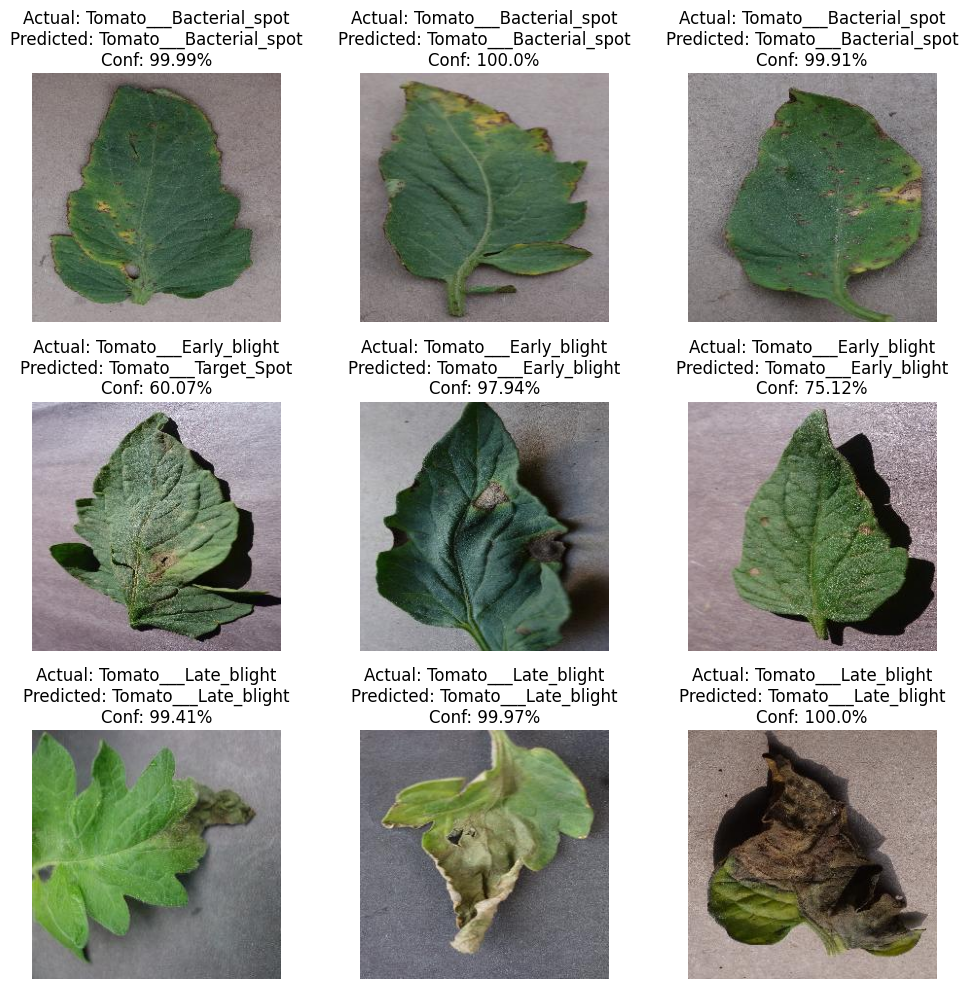

In [11]:
# Fungsi untuk memuat gambar, menormalkan, dan memprediksi
def predict_and_visualize_images(model, data_dir, class_names, image_size=(256, 256), grid_size=(3, 3)):
    # Ambil gambar dari direktori secara acak
    image_paths = []
    for class_folder in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            images_in_class = os.listdir(class_path)
            for img_file in images_in_class[:grid_size[0]]:  # Ambil sebagian gambar untuk grid
                image_paths.append(os.path.join(class_path, img_file))

    # Buat figure untuk menampilkan grid gambar
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths[:grid_size[0] * grid_size[1]]):
        # Memuat gambar
        img = image.load_img(img_path, target_size=image_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi

        # Prediksi menggunakan model
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        confidence = round(100 * np.max(predictions), 2)

        # Dapatkan label asli dari path
        actual_label = os.path.basename(os.path.dirname(img_path))
        predicted_label = class_names[predicted_class]

        # Plot gambar
        ax = plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(image.load_img(img_path))
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nConf: {confidence}%")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Path direktori validasi
val_dir = '/content/tomato/val'

# Ambil nama kelas dari folder
class_names = sorted(os.listdir(val_dir))

# Panggil fungsi untuk memvisualisasikan
predict_and_visualize_images(model, val_dir, class_names, image_size=(256, 256), grid_size=(3, 3))

In [26]:
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Bangkitproject/Models") + [0]])+1
model.save(f"/content/drive/MyDrive/Bangkitproject/Models/{model_version}.keras")

In [28]:
model.save("/content/drive/MyDrive/Bangkitproject/Models/tomato_disease_classifier_revised.keras")

Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


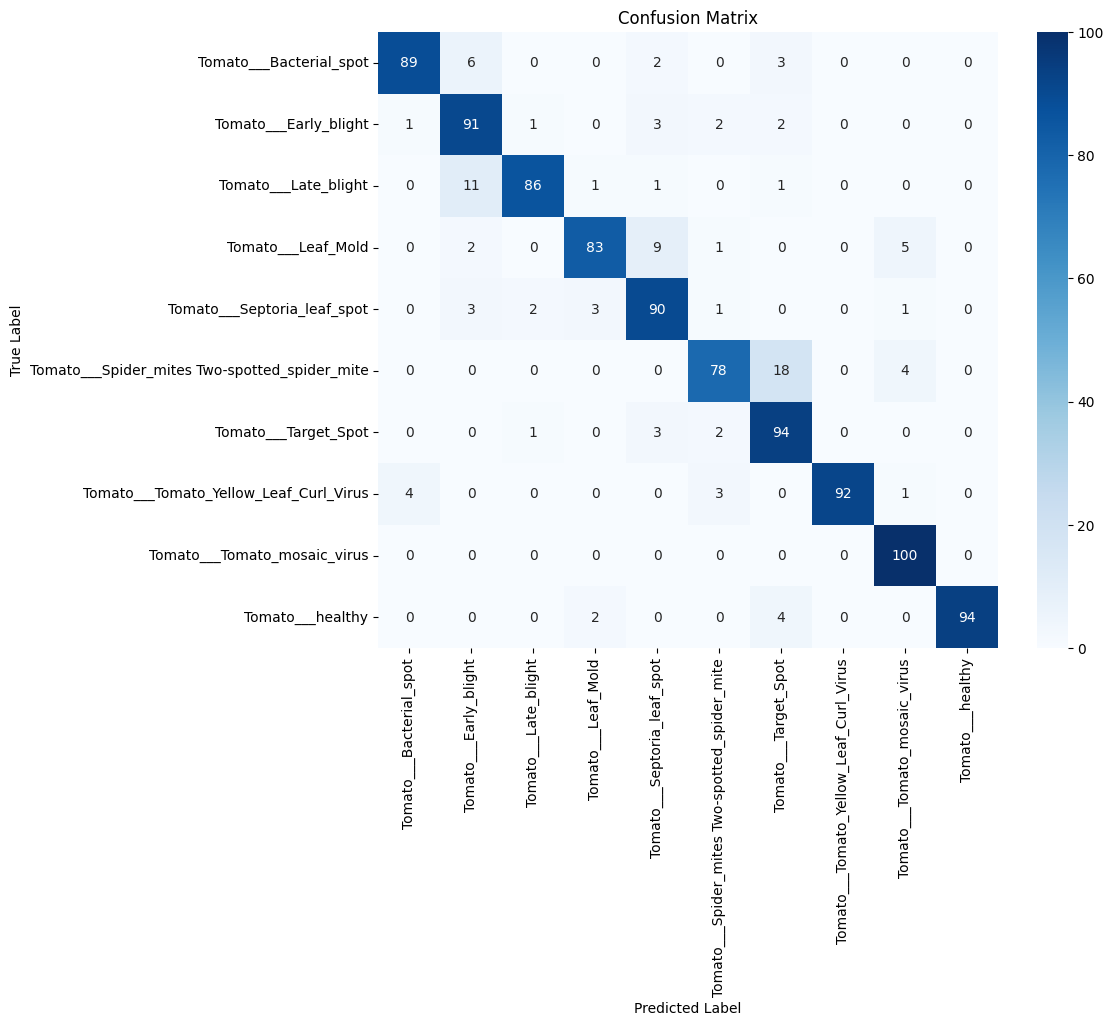

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.89      0.92       100
                        Tomato___Early_blight       0.81      0.91      0.85       100
                         Tomato___Late_blight       0.96      0.86      0.91       100
                           Tomato___Leaf_Mold       0.93      0.83      0.88       100
                  Tomato___Septoria_leaf_spot       0.83      0.90      0.87       100
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.78      0.83       100
                         Tomato___Target_Spot       0.77      0.94      0.85       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.92      0.96       100
                 Tomato___Tomato_mosaic_virus       0.90      1.00      0.95       100
                             Tomato___healthy       1.00      0.94      0.97       100

                  

In [30]:
# Load model yang sudah dilatih
model = tf.keras.models.load_model('/content/drive/MyDrive/Bangkitproject/Models/tomato_disease_classifier_revised.keras')

# Mendefinisikan ulang generator untuk data validasi tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
        val_dir,  # Ganti dengan path direktori data validasi
        target_size=(image_size, image_size),  # Ukuran gambar yang diharapkan
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# Mendapatkan prediksi dari model
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mendapatkan label sebenarnya
y_true = validation_generator.classes

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
print('Classification Report:')
print(class_report)

In [38]:
# Path ke gambar yang ingin diuji
img_path = '/content/tomato/val/Tomato___Tomato_mosaic_virus/0b5e2269-7b37-43ac-9a96-c62b9bba2383___PSU_CG 2243.JPG'  # Ganti dengan path gambar yang ingin diuji

# Memuat gambar dan menyesuaikan ukurannya
img = image.load_img(img_path, target_size=(image_size, image_size))

# Mengubah gambar menjadi larik numpy
img_array = image.img_to_array(img)

# Menambahkan dimensi batch (karena model memerlukan input batch)
img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model.predict(img_array)

# Mendapatkan indeks kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Mendapatkan nama folder dari path dataset untuk membuat daftar label
dataset_path = '/content/tomato/val'  # Ganti dengan path ke folder train yang berisi folder kelas
label_names = sorted(os.listdir(dataset_path))
print(label_names)

# Mendapatkan label kelas berdasarkan indeks prediksi
predicted_label = label_names[predicted_class]

print("Predicted class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Predicted class: Tomato___Tomato_mosaic_virus
